In [2192]:
import pandas as pd

# Read file
file_path = r'G:\My Drive\Python Projects\Airbnb Analysis Project\Data.xlsx'
df = pd.read_excel(file_path, sheet_name='BOOKINGS', header=None)
df.columns = df.iloc[1]
df = df[2:]
df.reset_index(drop=True, inplace=True)
df.columns.name = 'Header'

print(df.head())

Header   In  Dir  Let Shed  Out Rate Rate    ??              Name:  \
0       NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN                NaN   
1         x    x    x    x    x    5    5  Abnb   Athena Lysandrou   
2         x    x    x    x    x    5  NaN  Abnb   Lise Lotte Baert   
3         x    x    x    x    x    5    5  Abnb      Zimkita Mbete   
4         x    x    x    x    x    5    5  Abnb  Ebraheem Choonara   

Header            From  ... Nadia & Grant Jeanne & Marc Caz & Simon  CWP Paid  \
0                  NaN  ...           NaN           NaN         NaN       NaN   
1       Sedgefield, SA  ...           NaN           NaN         NaN    486.61   
2           Ghent, BEL  ...           NaN           NaN         NaN  486.6174   
3            Local, SA  ...           NaN           NaN         NaN   729.918   
4                   SA  ...           NaN           NaN         NaN   486.612   

Header                 Date CW Home Earnings Mang Fee TOTAL Earning Ea  
0                  

In [2193]:
# Clean up data
df_cleaned = df.drop(index=0).reset_index(drop=True)
df_cleaned = df_cleaned.drop(df_cleaned.columns[:5], axis=1)
df_cleaned = df_cleaned.fillna('')
df_cleaned = df_cleaned.rename(columns={'Rate': 'Give Rate', 'Rate': 'Rec Rate', '??': 'Via'})
rec_rate_indices = [i for i, col in enumerate(df_cleaned.columns) if col == 'Rec Rate']
if len(rec_rate_indices) > 0:
    first_rec_rate_idx = rec_rate_indices[0]
    df_cleaned.columns = [
        'Give Rate' if i == first_rec_rate_idx else col
        for i, col in enumerate(df_cleaned.columns)
    ]

# Drop columns
columns_to_remove = ['Give Rate', 'Pax', 'x', 'D', 'Steve & Daz', 'Gaby & Gary', 'Nadia & Grant', 'Jeanne & Marc', 'Caz & Simon', 'Date', \
                     'Earning Ea', 'Sub Total', 'Service Fee', 'Total', 'CW Plett', 'TOTAL']
df_cleaned = df_cleaned.drop(columns=columns_to_remove, axis=1)
df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned['Check in'] = pd.to_datetime(df_cleaned['Check in'], errors='coerce')
df_cleaned['Check out'] = pd.to_datetime(df_cleaned['Check out'], errors='coerce')
df_cleaned['Check in'] = df_cleaned['Check in'].apply(lambda x: '' if pd.isna(x) else x.strftime('%Y-%m-%d'))
df_cleaned['Check out'] = df_cleaned['Check out'].apply(lambda x: '' if pd.isna(x) else x.strftime('%Y-%m-%d'))

# Rename second 'Rec Rate', then drop it
columns = list(df_cleaned.columns)
rec_rate_indices = [i for i, col in enumerate(columns) if col == 'Rec Rate']
if len(rec_rate_indices) > 1:
    columns[rec_rate_indices[1]] = 'Rate'
df_cleaned.columns = columns
df_cleaned = df_cleaned.drop(columns=['Rate'])

# Covert to object columns to numeric
df_cleaned['Rec Rate'] = pd.to_numeric(df_cleaned['Rec Rate'], errors='coerce').round().fillna(0).astype(int)
df_cleaned['Nights'] = pd.to_numeric(df_cleaned['Nights'], errors='coerce').round().fillna(0).astype(int)
df_cleaned['CW Home'] = pd.to_numeric(df_cleaned['CW Home'], errors='coerce').round().fillna(0).astype(int)
df_cleaned['Earnings'] = pd.to_numeric(df_cleaned['Earnings'], errors='coerce').round().fillna(0).astype(int)
df_cleaned['Mang Fee'] = pd.to_numeric(df_cleaned['Mang Fee'], errors='coerce').round().fillna(0).astype(int)
df_cleaned['CWP Paid'] = pd.to_numeric(df_cleaned['CWP Paid'], errors='coerce').round().fillna(0).astype(int)

print(df_cleaned.head(10))

   Rec Rate   Via                   Name:             From     Cabin  \
0         5  Abnb        Athena Lysandrou   Sedgefield, SA  Clifftop   
1         0  Abnb        Lise Lotte Baert       Ghent, BEL  Clifftop   
2         5  Abnb           Zimkita Mbete        Local, SA  Wildside   
3         5  Abnb       Ebraheem Choonara               SA  Clifftop   
4         5  Abnb         Tobias Zolliker  Dielsdorft, SWZ  Clifftop   
5         5  Abnb          Andrea Ticozzi      Verona, ITA  Wildside   
6         5  Abnb         Jonas Lopatenko     Werdohl, GER  Wildside   
7         0                                                            
8         0  Abnb         Darren Westwood        Local, SA  Wildside   
9         5  Abnb  Hilton & Lindy Cameron    Port Eliz, SA  Clifftop   

     Check in   Check out  Nights  CWP Paid  CW Home  Earnings  Mang Fee  
0  2023-10-13  2023-10-15       2       487        0         0         0  
1  2023-10-24  2023-10-26       2       487        0     

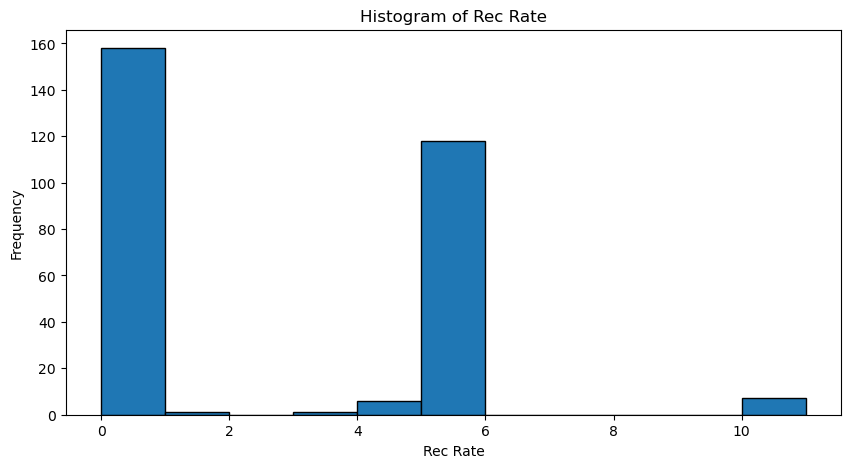

Mean: 4.9
Mode: 5
count: 291
Probability Distribution (%):
 Rating  Proportion
      0       54.30
      1        0.34
      3        0.34
      4        2.06
      5       40.55
     10        2.41


In [2194]:
# Analyse 'Rec Rate'

# Mean
mean_rec_rate = pd.to_numeric(df_cleaned['Rec Rate'], errors='coerce').round()[lambda x: (x != 0) & (x != 10)].mean().round(2)

# Mode
rec_rate = pd.to_numeric(df_cleaned['Rec Rate'], errors='coerce').round()
filtered_rec_rate = rec_rate[(rec_rate != 0) & (rec_rate != 10)]
mode_rec_rate = filtered_rec_rate.mode()
mode_value = mode_rec_rate[0] if not mode_rec_rate.empty else None

# Count
count = df_cleaned['Rec Rate'].count()

# Histogram
import matplotlib.pyplot as plt

rec_rate = pd.to_numeric(df_cleaned['Rec Rate'], errors='coerce').dropna()
plt.figure(figsize=(10, 5))
plt.hist(rec_rate, bins=range(int(rec_rate.min()), int(rec_rate.max()) + 2), edgecolor='black')
plt.title('Histogram of Rec Rate')
plt.xlabel('Rec Rate')
plt.ylabel('Frequency')
plt.show()

print(f"Mean: {mean_rec_rate}")
print(f"Mode: {mode_value}")
print(f"count: {count}")

# Probability
prob_dist = (rec_rate.value_counts(normalize=True).sort_index()* 100).round(2)
prob_dist = prob_dist.reset_index()
prob_dist.columns = ['Rating', 'Proportion']
prob_dist_str = prob_dist.to_string(index=False)

print("Probability Distribution (%):")
print(prob_dist_str)

Count for 'Via'
Via
Abnb    204
Pvt      27
Bcom     21
Fam      16
PH        7
LekS      3
Dir       2
Call      1


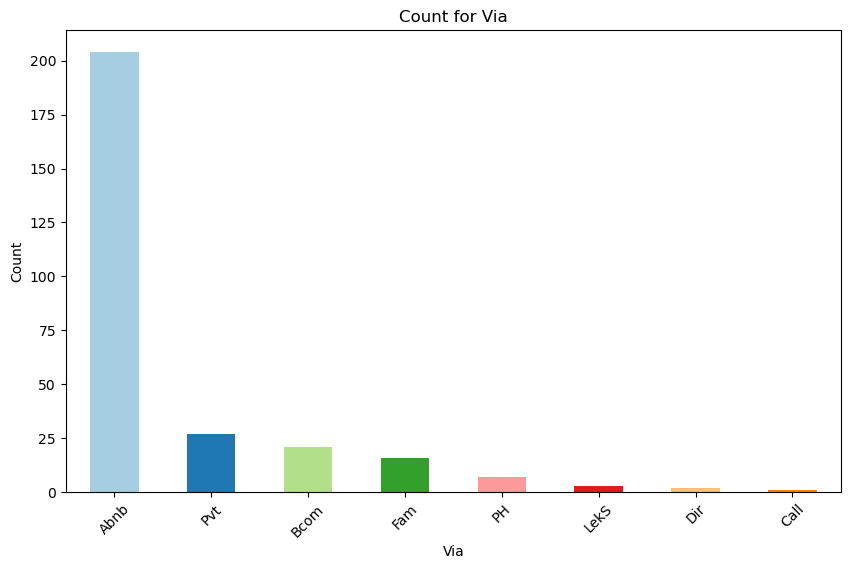

Probability Distribution (%):
Via
Abnb    72.60
Pvt      9.61
Bcom     7.47
Fam      5.69
PH       2.49
LekS     1.07
Dir      0.71
Call     0.36
Name: count, dtype: float64


In [2195]:
# count
via_counts = df_cleaned['Via'].replace('', pd.NA).dropna().value_counts()
via_counts_str = via_counts.to_string()
print("Count for 'Via'")
print(via_counts_str)

# Bar Chart
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(via_counts)))
via_counts.plot(kind='bar', color=colors)
plt.title('Count for Via')
plt.xlabel('Via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

total_count = via_counts.sum()
probabilities = (via_counts / total_count * 100).round(2)


print("Probability Distribution (%):")
print(probabilities)

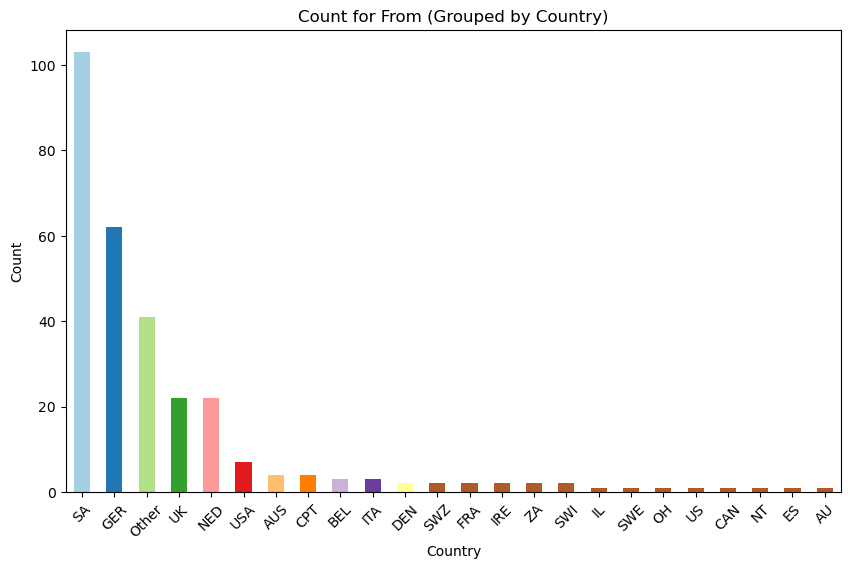

In [2196]:
# Bar Chart of "From"
df_cleaned['Country'] = df_cleaned['From'].str.extract(r'(\b[A-Z]{2,3}\b)')
df_cleaned['Country'] = df_cleaned['Country'].replace({'SA': 'SA', 'BEL': 'BEL', 'SWZ': 'SWZ', 'ITA': 'ITA', 'GER': 'GER', 'UK': 'UK'}).fillna('Other')
country_counts = df_cleaned['Country'].value_counts()
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(country_counts)))
country_counts.plot(kind='bar', color=colors)
plt.title('Count for From (Grouped by Country)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

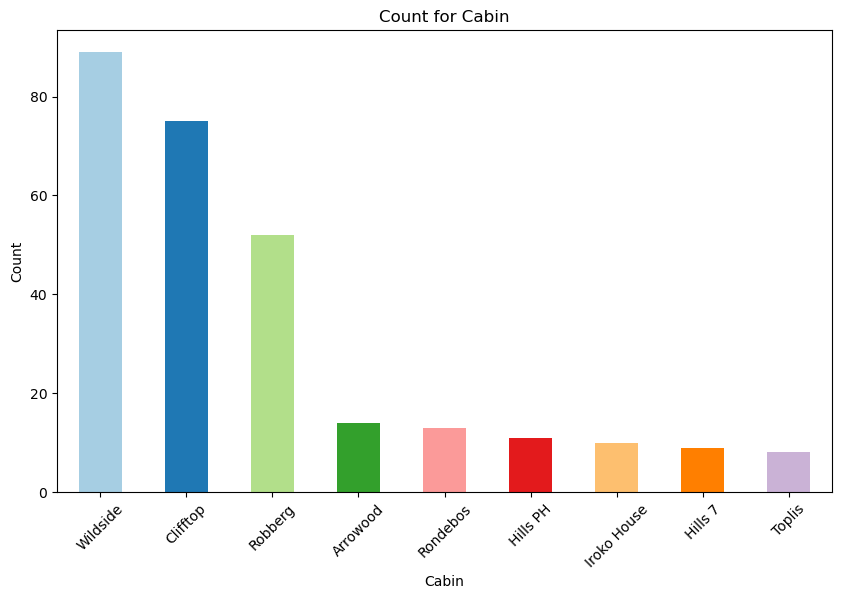

In [2197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame

# Standardize 'Cabin' names
def standardize_cabin(cabin):
    if pd.isna(cabin):
        return 'Unknown'
    cabin = cabin.strip()
    if 'Hills 7' in cabin:
        return 'Hills 7'
    elif 'Hills PH' in cabin:
        return 'Hills PH'
    elif 'Rondebos' in cabin:
        return 'Rondebos'
    else:
        return cabin

df_cleaned['Cabin'] = df_cleaned['Cabin'].apply(standardize_cabin)

# Calculate counts of each cabin type
cabin_counts = df_cleaned['Cabin'].replace('', pd.NA).dropna().value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(cabin_counts)))
cabin_counts.plot(kind='bar', color=colors)
plt.title('Count for Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13700\3626004916.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cabin'] = df_filtered['Cabin'].apply(standardize_cabin)


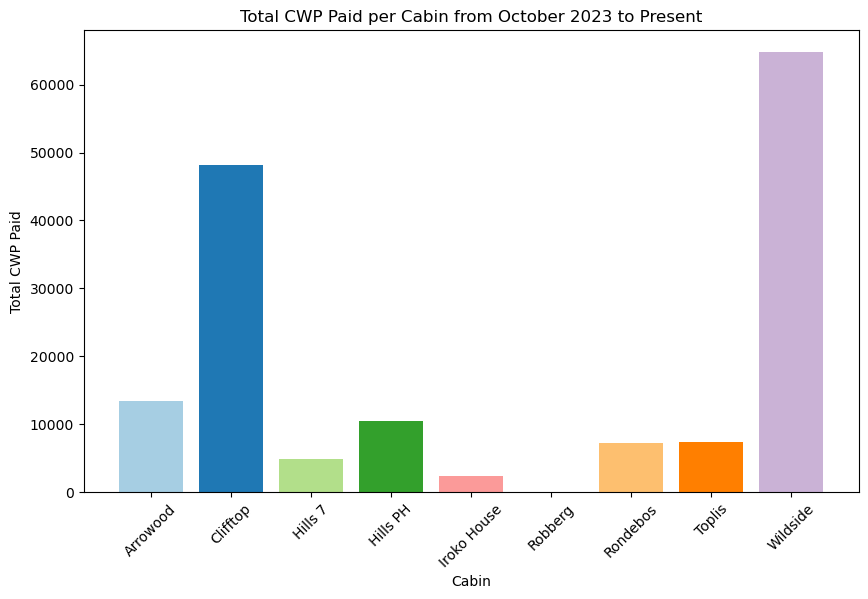

In [2198]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame

# Ensure 'CWP Paid' is converted to int, and remove any non-numeric values
df_cleaned['CWP Paid'] = pd.to_numeric(df_cleaned['CWP Paid'], errors='coerce').fillna(0).astype(int)

# Convert 'Check in' to datetime and filter data from October 2023 onwards
df_cleaned['Check in'] = pd.to_datetime(df_cleaned['Check in'], errors='coerce')
df_filtered = df_cleaned[df_cleaned['Check in'] >= '2023-10-01']

# Standardize 'Cabin' names
def standardize_cabin(cabin):
    if pd.isna(cabin):
        return 'Unknown'
    cabin = cabin.strip()
    if 'Hills 7' in cabin:
        return 'Hills 7'
    elif 'Hills PH' in cabin:
        return 'Hills PH'
    elif 'Rondebos' in cabin:
        return 'Rondebos'
    else:
        return cabin

df_filtered['Cabin'] = df_filtered['Cabin'].apply(standardize_cabin)

# Group by standardized 'Cabin' and sum 'CWP Paid'
df_grouped = df_filtered.groupby('Cabin')['CWP Paid'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Cabin'], df_grouped['CWP Paid'], color=colors)
plt.xlabel('Cabin')
plt.ylabel('Total CWP Paid')
plt.title('Total CWP Paid per Cabin from October 2023 to Present')
plt.xticks(rotation=45)
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13700\695162339.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cabin'] = df_filtered['Cabin'].apply(standardize_cabin)


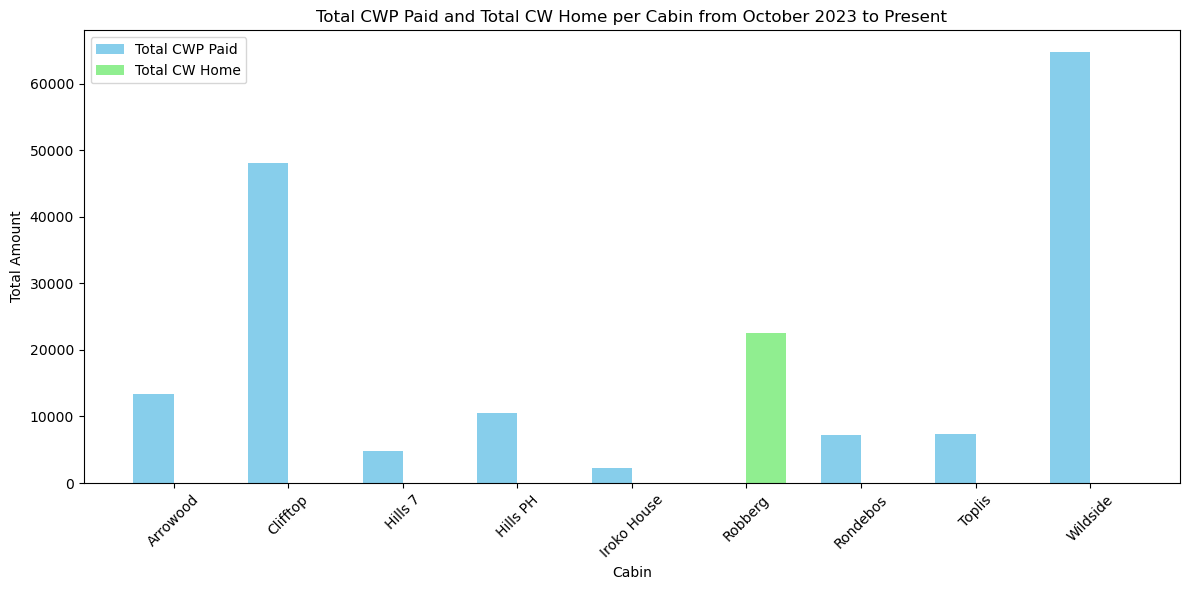

In [2199]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame

# Ensure 'CWP Paid' and 'CW Home' are converted to int, and remove any non-numeric values
df_cleaned['CWP Paid'] = pd.to_numeric(df_cleaned['CWP Paid'], errors='coerce').fillna(0).astype(int)
df_cleaned['CW Home'] = pd.to_numeric(df_cleaned['CW Home'], errors='coerce').fillna(0).astype(int)

# Convert 'Check in' to datetime and filter data from October 2023 onwards
df_cleaned['Check in'] = pd.to_datetime(df_cleaned['Check in'], errors='coerce')
df_filtered = df_cleaned[df_cleaned['Check in'] >= '2023-10-01']

# Standardize 'Cabin' names
def standardize_cabin(cabin):
    if pd.isna(cabin):
        return 'Unknown'
    cabin = cabin.strip()
    if 'Hills 7' in cabin:
        return 'Hills 7'
    elif 'Hills PH' in cabin:
        return 'Hills PH'
    elif 'Rondebos' in cabin:
        return 'Rondebos'
    elif 'CW Home' in cabin:
        return 'Robberg'  # Combine 'CW Home' with 'Robberg'
    elif 'Robberg' in cabin:
        return 'Robberg'
    else:
        return cabin

df_filtered['Cabin'] = df_filtered['Cabin'].apply(standardize_cabin)

# Group by standardized 'Cabin' and sum 'CWP Paid' and 'CW Home'
df_grouped = df_filtered.groupby('Cabin').agg({
    'CWP Paid': 'sum',
    'CW Home': 'sum'
}).reset_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df_grouped))

# Plot 'CWP Paid'
plt.bar(index, df_grouped['CWP Paid'], bar_width, label='Total CWP Paid', color='skyblue')

# Plot 'CW Home' on the same graph
plt.bar([i + bar_width for i in index], df_grouped['CW Home'], bar_width, label='Total CW Home', color='lightgreen')

plt.xlabel('Cabin')
plt.ylabel('Total Amount')
plt.title('Total CWP Paid and Total CW Home per Cabin from October 2023 to Present')
plt.xticks([i + bar_width / 2 for i in index], df_grouped['Cabin'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


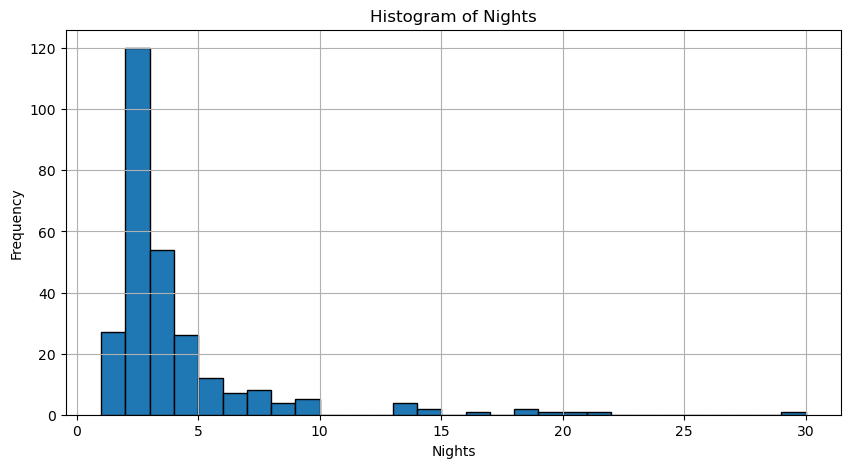

In [2200]:
import matplotlib.pyplot as plt

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Clean Data
df_cleaned = df[df['Nights'] > 0]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['Nights'], bins=range(1, df_cleaned['Nights'].max() + 2), edgecolor='black')
plt.xlabel('Nights')
plt.ylabel('Frequency')
plt.title('Histogram of Nights')
plt.grid(True)
plt.show()

In [2201]:
# Mean, Max & Min 'CW Home'
df.columns = df.columns.str.strip()
df_cleaned = df[df['CW Home'] != 0]
mean_cw_home = df_cleaned['CW Home'].mean().round(2)
max_cw_home = df_cleaned['CW Home'].max()
min_cw_home = df_cleaned['CW Home'].min()

print(mean_cw_home)
print(max_cw_home)
print(min_cw_home)

5417.54
16394
1305.68


15625.76
34962.355599999995
3406.3054


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13700\1683643206.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Earnings'].replace(0, np.nan, inplace=True)


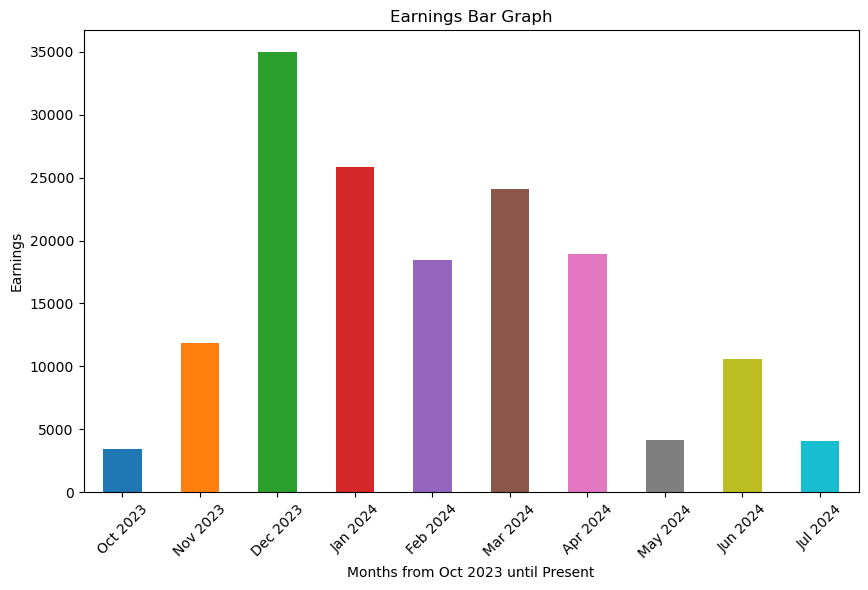

In [2202]:
## Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Convert 'Earnings' to numeric, forcing errors to NaN
df['Earnings'] = pd.to_numeric(df['Earnings'], errors='coerce')

# Clean Data: Filter out zeros in 'Earnings'
df_cleaned = df[df['Earnings'] != 0]

# Calculate mean, max, and min of 'Earnings' excluding zeros
mean_earnings = df_cleaned['Earnings'].mean().round(2)
max_earnings = df_cleaned['Earnings'].max()
min_earnings = df_cleaned['Earnings'].min()

print(mean_earnings)
print(max_earnings)
print(min_earnings)

# bar graph
import numpy as np

df_cleaned['Earnings'] = pd.to_numeric(df_cleaned['Earnings'], errors='coerce')
df_cleaned['Earnings'].replace(0, np.nan, inplace=True)
df_cleaned.dropna(subset=['Earnings'], inplace=True)
months = pd.date_range(start='2023-10-01', end=pd.Timestamp.today(), freq='MS').strftime('%b %Y').tolist()
months = months[:len(df_cleaned)]
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.arange(len(df_cleaned)))
df_cleaned['Earnings'].plot(kind='bar', color=colors)
plt.xlabel('Months from Oct 2023 until Present')
plt.ylabel('Earnings')
plt.title('Earnings Bar Graph')
plt.xticks(ticks=range(len(df_cleaned)), labels=months, rotation=45)

plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13700\2386965280.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Earnings', 'Mang Fee', 'CW Home']].replace(0, np.nan, inplace=True)


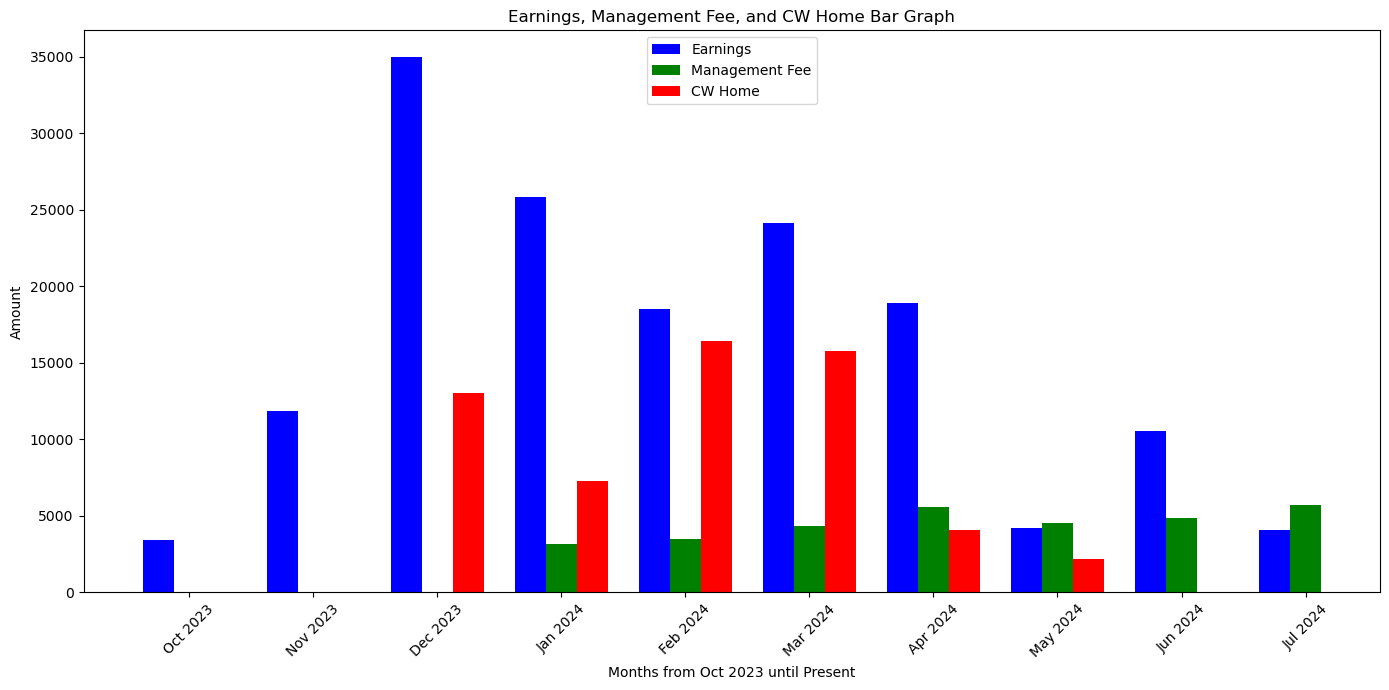

In [2203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cleaned is your DataFrame
# Clean the data by converting non-numeric values to NaN and replace zeros with NaN
df_cleaned['Earnings'] = pd.to_numeric(df_cleaned['Earnings'], errors='coerce')
df_cleaned['Mang Fee'] = pd.to_numeric(df_cleaned['Mang Fee'], errors='coerce')
df_cleaned['CW Home'] = pd.to_numeric(df_cleaned['CW Home'], errors='coerce')
df_cleaned[['Earnings', 'Mang Fee', 'CW Home']].replace(0, np.nan, inplace=True)

# Drop rows where all 'Earnings', 'Mang Fee', and 'CW Home' are NaN (optional)
df_cleaned.dropna(subset=['Earnings', 'Mang Fee', 'CW Home'], how='all', inplace=True)

# Generate the list of month labels from October 2023 until the current month
months = pd.date_range(start='2023-10-01', end=pd.Timestamp.today(), freq='MS').strftime('%b %Y').tolist()

# Ensure the number of month labels matches the number of data points
months = months[:len(df_cleaned)]

# Plotting the bar graph
plt.figure(figsize=(14, 7))

bar_width = 0.25  # Adjusted bar width to fit three sets of bars
index = np.arange(len(df_cleaned))

# Plot Earnings
plt.bar(index, df_cleaned['Earnings'], bar_width, label='Earnings', color='b')

# Plot Management Fee
plt.bar(index + bar_width, df_cleaned['Mang Fee'], bar_width, label='Management Fee', color='g')

# Plot CW Home
plt.bar(index + 2 * bar_width, df_cleaned['CW Home'], bar_width, label='CW Home', color='r')

# Adding labels and title
plt.xlabel('Months from Oct 2023 until Present')
plt.ylabel('Amount')
plt.title('Earnings, Management Fee, and CW Home Bar Graph')
plt.xticks(ticks=index + bar_width, labels=months, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13700\3995122426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Earnings', 'Mang Fee', 'CW Home']].replace(0, np.nan, inplace=True)


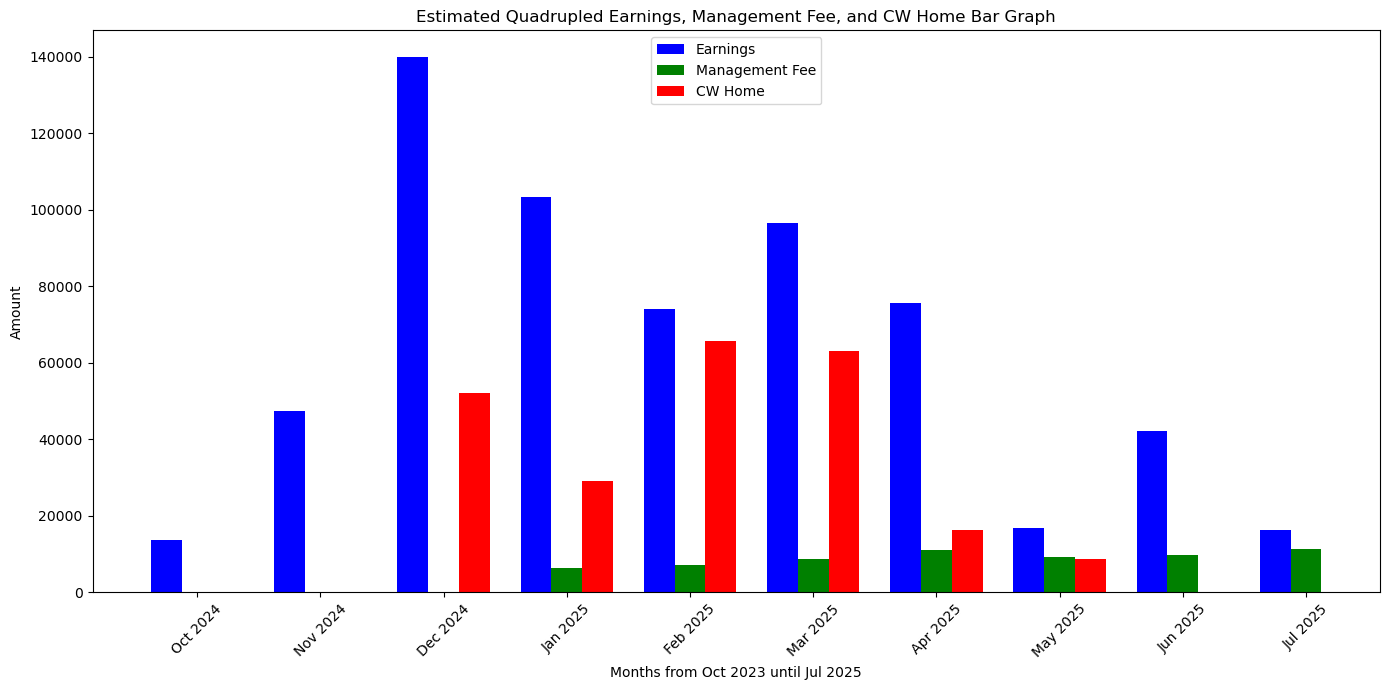

In [2204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cleaned is your DataFrame
# Clean the data by converting non-numeric values to NaN and replace zeros with NaN
df_cleaned['Earnings'] = pd.to_numeric(df_cleaned['Earnings'], errors='coerce')
df_cleaned['Mang Fee'] = pd.to_numeric(df_cleaned['Mang Fee'], errors='coerce')
df_cleaned['CW Home'] = pd.to_numeric(df_cleaned['CW Home'], errors='coerce')
df_cleaned[['Earnings', 'Mang Fee', 'CW Home']].replace(0, np.nan, inplace=True)

# Drop rows where all 'Earnings', 'Mang Fee', and 'CW Home' are NaN (optional)
df_cleaned.dropna(subset=['Earnings', 'Mang Fee', 'CW Home'], how='all', inplace=True)

# Generate the list of month labels from October 2023 until July 2025
months = pd.date_range(start='2024-10-01', end='2025-07-01', freq='MS').strftime('%b %Y').tolist()

# Ensure the number of month labels matches the number of data points
months = months[:len(df_cleaned)]

# Quadruple the values
df_cleaned['Earnings'] *= 4
df_cleaned['Mang Fee'] *= 2
df_cleaned['CW Home'] *= 4

# Plotting the bar graph
plt.figure(figsize=(14, 7))

bar_width = 0.25  # Adjusted bar width to fit three sets of bars
index = np.arange(len(df_cleaned))

# Plot Earnings
plt.bar(index, df_cleaned['Earnings'], bar_width, label='Earnings', color='b')

# Plot Management Fee
plt.bar(index + bar_width, df_cleaned['Mang Fee'], bar_width, label='Management Fee', color='g')

# Plot CW Home
plt.bar(index + 2 * bar_width, df_cleaned['CW Home'], bar_width, label='CW Home', color='r')

# Adding labels and title
plt.xlabel('Months from Oct 2023 until Jul 2025')
plt.ylabel('Amount')
plt.title('Estimated Quadrupled Earnings, Management Fee, and CW Home Bar Graph')
plt.xticks(ticks=index + bar_width, labels=months, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
